In [1]:
from scholarly import scholarly
import pandas as pd
import matplotlib.pyplot as plt
import argparse
import time

import scienceplots

plt.style.use(['science','notebook', 'grid'])

In [2]:
def search_articles(keywords: list, start_year: int, end_year: int):
    
    assert start_year < end_year, 'comediante'
    
    articles = []
    
    for keyword in keywords:
        
        print(f'Searching: "{keyword}" \n')
        
        search_query = scholarly.search_pubs(keyword)
        

        for pub in search_query:
            pub_year = pub.get('bib').get('pub_year')
            
            try:
                pub_year = int(pub_year)
            except (ValueError, TypeError):
                continue  # Skip entries with invalid or missing publication year
            
            if pub_year and start_year <= pub_year <= end_year:
                articles.append(pub_year)
        
        time.sleep(5)
        
    return articles

In [3]:
def plot_articles_per_year(articles):
    df = pd.DataFrame(articles, columns=['Year'])
    df['Count'] = 1
    df = df.groupby('Year').count().reset_index()

    plt.figure(figsize=(10, 5))
    plt.bar(df['Year'], df['Count'])
    plt.title('Number of Articles Containing Keyword per Year')
    plt.xlabel('Year')
    plt.ylabel('Number of Articles')
    plt.grid(True)
    plt.show()

In [4]:
keywords = ['multicrystalline silicon',
           'multi-crystalline silicon',
           ]

start_year = 2014
end_year = 2024

In [5]:
articles = search_articles(keywords, start_year, end_year)

Searching: "multicrystalline silicon" 

Searching: "multi-crystalline silicon" 



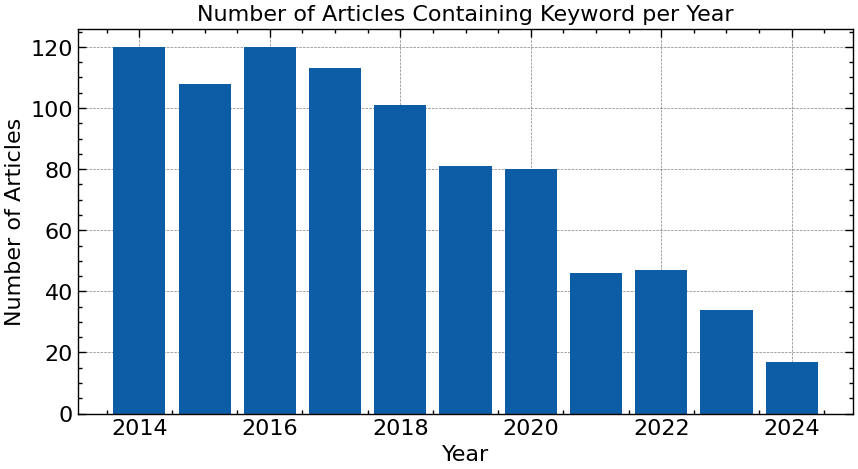

In [6]:
plot_articles_per_year(articles)